# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 3.3MB/s eta 0:00:01   57% |██████████████████▍             | 8.4MB 23.9MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

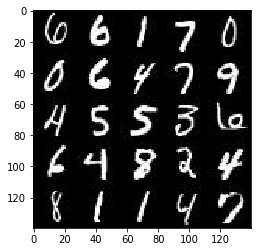

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

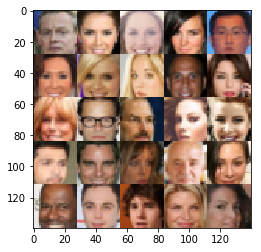

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32,name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [27]:
def discriminator(images, reuse=False,alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    keep_prob = 0.7

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [29]:
def generator(z, out_channel_dim, is_train=True,alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    keep_prob=0.9
    with tf.variable_scope('generator', reuse=not is_train):
    
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
#         x1=tf.nn.dropout(x1,keep_prob=keep_prob)


        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2=tf.nn.dropout(x2,keep_prob=keep_prob)
        
#         x3 = tf.layers.conv2d_transpose(x2, 512, 5, strides=1, padding='same',activation=None)
#         x3 = tf.layers.batch_normalization(x3, training=is_train)
#         x3 = tf.maximum(alpha * x3, x3)
#         x3=tf.nn.dropout(x3,keep_prob=keep_prob)

        

        x4 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',activation=None)
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4=tf.nn.dropout(x4,keep_prob=keep_prob)

            
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=1, padding='same',activation=None)
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
    return out
    
    

        
    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth=0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

#         ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
#     g_updates = [opt for opt in ops if opt.name.startswith('generator')]
#     with tf.control_dependencies(g_updates):
#         g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#     print(data_shape)
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
#     return losses   
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Generator Loss: 3.8847 Discriminator Loss: 0.4964...
Epoch 1/2... Generator Loss: 4.6112 Discriminator Loss: 0.4023...
Epoch 1/2... Generator Loss: 3.3607 Discriminator Loss: 0.4424...
Epoch 1/2... Generator Loss: 6.1083 Discriminator Loss: 1.2040...
Epoch 1/2... Generator Loss: 0.6002 Discriminator Loss: 2.2927...
Epoch 1/2... Generator Loss: 1.3155 Discriminator Loss: 1.1265...
Epoch 1/2... Generator Loss: 1.3319 Discriminator Loss: 1.1393...
Epoch 1/2... Generator Loss: 1.1503 Discriminator Loss: 1.2188...
Epoch 1/2... Generator Loss: 0.5997 Discriminator Loss: 1.7340...
Epoch 1/2... Generator Loss: 0.9694 Discriminator Loss: 1.1369...


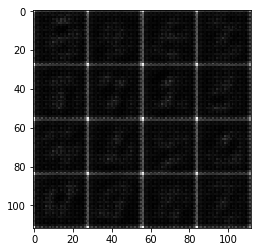

Epoch 1/2... Generator Loss: 1.9161 Discriminator Loss: 1.5781...
Epoch 1/2... Generator Loss: 0.9965 Discriminator Loss: 1.2191...
Epoch 1/2... Generator Loss: 1.2080 Discriminator Loss: 1.3566...
Epoch 1/2... Generator Loss: 0.9894 Discriminator Loss: 1.2375...
Epoch 1/2... Generator Loss: 0.9887 Discriminator Loss: 1.1443...
Epoch 1/2... Generator Loss: 0.9738 Discriminator Loss: 1.3158...
Epoch 1/2... Generator Loss: 1.4830 Discriminator Loss: 1.3785...
Epoch 1/2... Generator Loss: 1.3218 Discriminator Loss: 1.3599...
Epoch 1/2... Generator Loss: 1.0336 Discriminator Loss: 1.2119...
Epoch 1/2... Generator Loss: 1.0772 Discriminator Loss: 1.1409...


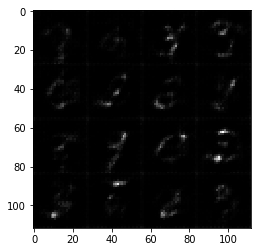

Epoch 1/2... Generator Loss: 1.1321 Discriminator Loss: 1.1634...
Epoch 1/2... Generator Loss: 1.5552 Discriminator Loss: 1.2787...
Epoch 1/2... Generator Loss: 0.8244 Discriminator Loss: 1.2635...
Epoch 1/2... Generator Loss: 2.0030 Discriminator Loss: 1.3841...
Epoch 1/2... Generator Loss: 1.6065 Discriminator Loss: 1.0704...
Epoch 1/2... Generator Loss: 1.1573 Discriminator Loss: 1.1071...
Epoch 1/2... Generator Loss: 1.0911 Discriminator Loss: 1.1583...
Epoch 1/2... Generator Loss: 1.0404 Discriminator Loss: 1.1171...
Epoch 1/2... Generator Loss: 1.3843 Discriminator Loss: 1.2610...
Epoch 1/2... Generator Loss: 2.1805 Discriminator Loss: 1.4722...


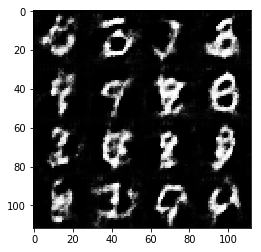

Epoch 1/2... Generator Loss: 1.1593 Discriminator Loss: 1.1414...
Epoch 1/2... Generator Loss: 1.6923 Discriminator Loss: 1.2555...
Epoch 1/2... Generator Loss: 2.0478 Discriminator Loss: 1.4321...
Epoch 1/2... Generator Loss: 1.3515 Discriminator Loss: 1.2396...
Epoch 1/2... Generator Loss: 0.8177 Discriminator Loss: 1.2579...
Epoch 1/2... Generator Loss: 0.8770 Discriminator Loss: 1.2471...
Epoch 1/2... Generator Loss: 1.3038 Discriminator Loss: 1.2691...
Epoch 1/2... Generator Loss: 1.4306 Discriminator Loss: 1.2975...
Epoch 1/2... Generator Loss: 1.4791 Discriminator Loss: 1.3123...
Epoch 1/2... Generator Loss: 0.7532 Discriminator Loss: 1.2047...


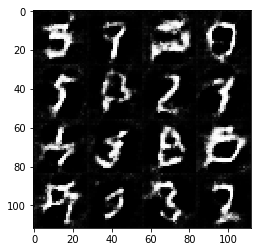

Epoch 1/2... Generator Loss: 1.9471 Discriminator Loss: 1.4342...
Epoch 1/2... Generator Loss: 0.8035 Discriminator Loss: 1.2425...
Epoch 1/2... Generator Loss: 1.2032 Discriminator Loss: 1.2055...
Epoch 1/2... Generator Loss: 0.7805 Discriminator Loss: 1.3220...
Epoch 1/2... Generator Loss: 0.9421 Discriminator Loss: 1.2340...
Epoch 1/2... Generator Loss: 0.6746 Discriminator Loss: 1.3692...
Epoch 2/2... Generator Loss: 1.3609 Discriminator Loss: 1.2458...
Epoch 2/2... Generator Loss: 1.2025 Discriminator Loss: 1.2382...
Epoch 2/2... Generator Loss: 0.9534 Discriminator Loss: 1.1883...
Epoch 2/2... Generator Loss: 0.8346 Discriminator Loss: 1.2327...


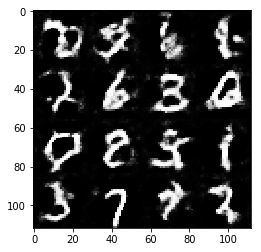

Epoch 2/2... Generator Loss: 1.0807 Discriminator Loss: 1.2600...
Epoch 2/2... Generator Loss: 1.2683 Discriminator Loss: 1.1457...
Epoch 2/2... Generator Loss: 1.0200 Discriminator Loss: 1.2256...
Epoch 2/2... Generator Loss: 1.8902 Discriminator Loss: 1.4698...
Epoch 2/2... Generator Loss: 0.9609 Discriminator Loss: 1.2671...
Epoch 2/2... Generator Loss: 0.9786 Discriminator Loss: 1.2332...
Epoch 2/2... Generator Loss: 0.8079 Discriminator Loss: 1.3830...
Epoch 2/2... Generator Loss: 0.7816 Discriminator Loss: 1.3121...
Epoch 2/2... Generator Loss: 1.1400 Discriminator Loss: 1.2271...
Epoch 2/2... Generator Loss: 0.5864 Discriminator Loss: 1.4053...


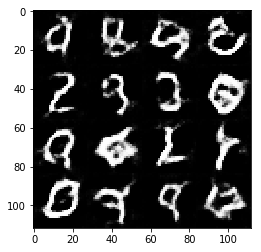

Epoch 2/2... Generator Loss: 0.8415 Discriminator Loss: 1.2000...
Epoch 2/2... Generator Loss: 0.8131 Discriminator Loss: 1.2635...
Epoch 2/2... Generator Loss: 1.0031 Discriminator Loss: 1.2236...
Epoch 2/2... Generator Loss: 1.3879 Discriminator Loss: 1.2379...
Epoch 2/2... Generator Loss: 0.8828 Discriminator Loss: 1.2365...
Epoch 2/2... Generator Loss: 0.6141 Discriminator Loss: 1.3306...
Epoch 2/2... Generator Loss: 0.8733 Discriminator Loss: 1.2566...
Epoch 2/2... Generator Loss: 1.3530 Discriminator Loss: 1.2240...
Epoch 2/2... Generator Loss: 1.1979 Discriminator Loss: 1.2458...
Epoch 2/2... Generator Loss: 1.2038 Discriminator Loss: 1.2038...


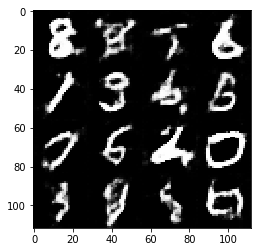

Epoch 2/2... Generator Loss: 1.1851 Discriminator Loss: 1.2630...
Epoch 2/2... Generator Loss: 1.1494 Discriminator Loss: 1.2976...
Epoch 2/2... Generator Loss: 0.8240 Discriminator Loss: 1.2192...
Epoch 2/2... Generator Loss: 0.9419 Discriminator Loss: 1.1979...
Epoch 2/2... Generator Loss: 1.2528 Discriminator Loss: 1.2116...
Epoch 2/2... Generator Loss: 0.6071 Discriminator Loss: 1.3919...
Epoch 2/2... Generator Loss: 1.2561 Discriminator Loss: 1.2289...
Epoch 2/2... Generator Loss: 0.6955 Discriminator Loss: 1.2330...
Epoch 2/2... Generator Loss: 1.0707 Discriminator Loss: 1.1526...
Epoch 2/2... Generator Loss: 1.1077 Discriminator Loss: 1.1388...


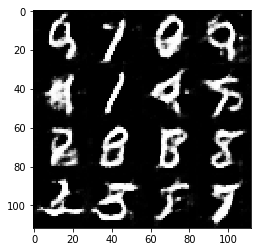

Epoch 2/2... Generator Loss: 0.7192 Discriminator Loss: 1.3076...
Epoch 2/2... Generator Loss: 1.0273 Discriminator Loss: 1.2559...
Epoch 2/2... Generator Loss: 1.0915 Discriminator Loss: 1.1772...
Epoch 2/2... Generator Loss: 1.4172 Discriminator Loss: 1.2764...
Epoch 2/2... Generator Loss: 1.1919 Discriminator Loss: 1.2014...
Epoch 2/2... Generator Loss: 1.6210 Discriminator Loss: 1.1800...
Epoch 2/2... Generator Loss: 1.4666 Discriminator Loss: 1.1011...
Epoch 2/2... Generator Loss: 1.2950 Discriminator Loss: 1.1297...
Epoch 2/2... Generator Loss: 0.9434 Discriminator Loss: 1.1660...
Epoch 2/2... Generator Loss: 0.7961 Discriminator Loss: 1.2078...


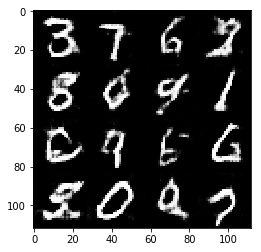

Epoch 2/2... Generator Loss: 1.1279 Discriminator Loss: 1.1167...
Epoch 2/2... Generator Loss: 0.5783 Discriminator Loss: 1.3773...
Epoch 2/2... Generator Loss: 0.7196 Discriminator Loss: 1.2594...


In [28]:
batch_size = 128
z_dim = 100
learning_rate = .0002
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Generator Loss: 4.9474 Discriminator Loss: 0.3872...
Epoch 1/2... Generator Loss: 4.6438 Discriminator Loss: 0.3937...
Epoch 1/2... Generator Loss: 5.3575 Discriminator Loss: 0.3731...
Epoch 1/2... Generator Loss: 5.6824 Discriminator Loss: 0.3690...
Epoch 1/2... Generator Loss: 4.7783 Discriminator Loss: 0.3830...
Epoch 1/2... Generator Loss: 0.2260 Discriminator Loss: 2.6605...
Epoch 1/2... Generator Loss: 5.4131 Discriminator Loss: 0.4164...
Epoch 1/2... Generator Loss: 5.9310 Discriminator Loss: 0.3782...
Epoch 1/2... Generator Loss: 9.6183 Discriminator Loss: 2.4793...
Epoch 1/2... Generator Loss: 9.4977 Discriminator Loss: 1.7605...


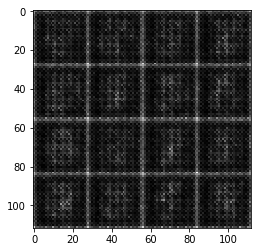

Epoch 1/2... Generator Loss: 1.7032 Discriminator Loss: 0.7343...
Epoch 1/2... Generator Loss: 1.6187 Discriminator Loss: 1.2613...
Epoch 1/2... Generator Loss: 1.5924 Discriminator Loss: 0.7850...
Epoch 1/2... Generator Loss: 1.2559 Discriminator Loss: 1.1224...
Epoch 1/2... Generator Loss: 1.8607 Discriminator Loss: 1.0469...
Epoch 1/2... Generator Loss: 1.7589 Discriminator Loss: 1.0914...
Epoch 1/2... Generator Loss: 1.3809 Discriminator Loss: 1.2327...
Epoch 1/2... Generator Loss: 1.1700 Discriminator Loss: 1.2112...
Epoch 1/2... Generator Loss: 1.7114 Discriminator Loss: 1.0554...
Epoch 1/2... Generator Loss: 1.0579 Discriminator Loss: 1.1235...


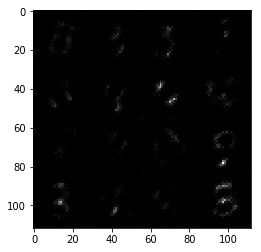

Epoch 1/2... Generator Loss: 1.4502 Discriminator Loss: 1.2275...
Epoch 1/2... Generator Loss: 1.0377 Discriminator Loss: 1.1850...
Epoch 1/2... Generator Loss: 1.1093 Discriminator Loss: 1.1102...
Epoch 1/2... Generator Loss: 1.6186 Discriminator Loss: 0.9814...
Epoch 1/2... Generator Loss: 1.7101 Discriminator Loss: 1.0711...
Epoch 1/2... Generator Loss: 1.1085 Discriminator Loss: 1.1572...
Epoch 1/2... Generator Loss: 1.7816 Discriminator Loss: 1.1415...
Epoch 1/2... Generator Loss: 1.9471 Discriminator Loss: 1.1419...
Epoch 1/2... Generator Loss: 1.4041 Discriminator Loss: 1.0509...
Epoch 1/2... Generator Loss: 1.6709 Discriminator Loss: 1.0855...


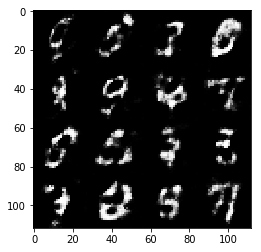

Epoch 1/2... Generator Loss: 2.1083 Discriminator Loss: 1.0465...
Epoch 1/2... Generator Loss: 1.5654 Discriminator Loss: 1.0277...
Epoch 1/2... Generator Loss: 1.8292 Discriminator Loss: 0.9846...
Epoch 1/2... Generator Loss: 1.6763 Discriminator Loss: 0.9752...
Epoch 1/2... Generator Loss: 1.3219 Discriminator Loss: 1.0236...
Epoch 1/2... Generator Loss: 1.3720 Discriminator Loss: 1.0017...
Epoch 1/2... Generator Loss: 2.0769 Discriminator Loss: 1.2407...
Epoch 1/2... Generator Loss: 1.4042 Discriminator Loss: 0.9049...
Epoch 1/2... Generator Loss: 1.8597 Discriminator Loss: 1.0027...
Epoch 1/2... Generator Loss: 1.2740 Discriminator Loss: 1.0141...


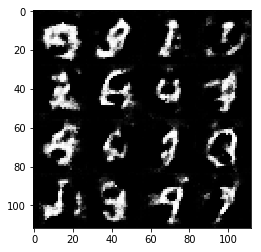

Epoch 1/2... Generator Loss: 1.7465 Discriminator Loss: 1.1727...
Epoch 1/2... Generator Loss: 1.0727 Discriminator Loss: 1.0628...
Epoch 1/2... Generator Loss: 1.2109 Discriminator Loss: 1.0670...
Epoch 1/2... Generator Loss: 1.1019 Discriminator Loss: 1.0542...
Epoch 1/2... Generator Loss: 1.0066 Discriminator Loss: 1.2040...
Epoch 1/2... Generator Loss: 0.7886 Discriminator Loss: 1.3173...
Epoch 2/2... Generator Loss: 1.9803 Discriminator Loss: 1.2168...
Epoch 2/2... Generator Loss: 1.3414 Discriminator Loss: 1.1195...
Epoch 2/2... Generator Loss: 1.2744 Discriminator Loss: 1.1610...
Epoch 2/2... Generator Loss: 1.3054 Discriminator Loss: 1.1861...


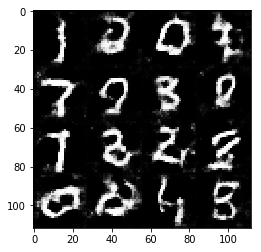

Epoch 2/2... Generator Loss: 0.9040 Discriminator Loss: 1.1293...
Epoch 2/2... Generator Loss: 1.9972 Discriminator Loss: 1.1785...
Epoch 2/2... Generator Loss: 1.7712 Discriminator Loss: 1.1328...
Epoch 2/2... Generator Loss: 1.5976 Discriminator Loss: 1.1670...
Epoch 2/2... Generator Loss: 0.8593 Discriminator Loss: 1.2740...
Epoch 2/2... Generator Loss: 1.5180 Discriminator Loss: 1.1362...
Epoch 2/2... Generator Loss: 0.8287 Discriminator Loss: 1.1923...
Epoch 2/2... Generator Loss: 1.1242 Discriminator Loss: 1.1404...
Epoch 2/2... Generator Loss: 1.2925 Discriminator Loss: 1.0825...
Epoch 2/2... Generator Loss: 1.3196 Discriminator Loss: 1.1723...


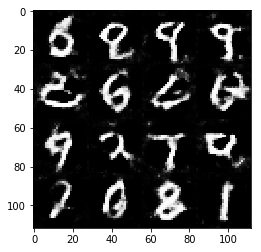

Epoch 2/2... Generator Loss: 1.2573 Discriminator Loss: 1.1011...
Epoch 2/2... Generator Loss: 1.1059 Discriminator Loss: 1.1132...
Epoch 2/2... Generator Loss: 1.0258 Discriminator Loss: 1.1282...
Epoch 2/2... Generator Loss: 1.2967 Discriminator Loss: 1.1185...
Epoch 2/2... Generator Loss: 1.2694 Discriminator Loss: 1.1474...
Epoch 2/2... Generator Loss: 1.0759 Discriminator Loss: 1.1275...
Epoch 2/2... Generator Loss: 1.7218 Discriminator Loss: 1.0888...
Epoch 2/2... Generator Loss: 0.7247 Discriminator Loss: 1.2899...
Epoch 2/2... Generator Loss: 1.1735 Discriminator Loss: 1.0592...
Epoch 2/2... Generator Loss: 0.8867 Discriminator Loss: 1.2384...


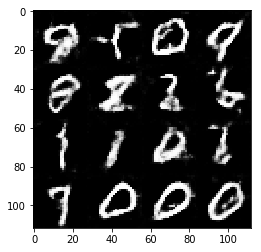

Epoch 2/2... Generator Loss: 1.3494 Discriminator Loss: 1.2057...
Epoch 2/2... Generator Loss: 1.2161 Discriminator Loss: 1.1507...
Epoch 2/2... Generator Loss: 0.9944 Discriminator Loss: 1.0802...
Epoch 2/2... Generator Loss: 1.2441 Discriminator Loss: 1.0702...
Epoch 2/2... Generator Loss: 1.7108 Discriminator Loss: 1.3050...
Epoch 2/2... Generator Loss: 0.6930 Discriminator Loss: 1.3803...
Epoch 2/2... Generator Loss: 0.9359 Discriminator Loss: 1.1120...
Epoch 2/2... Generator Loss: 0.8357 Discriminator Loss: 1.2410...
Epoch 2/2... Generator Loss: 0.9836 Discriminator Loss: 1.2057...
Epoch 2/2... Generator Loss: 1.4753 Discriminator Loss: 1.0846...


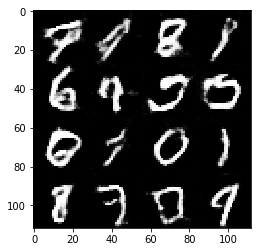

Epoch 2/2... Generator Loss: 0.9493 Discriminator Loss: 1.1832...
Epoch 2/2... Generator Loss: 1.1404 Discriminator Loss: 1.2833...
Epoch 2/2... Generator Loss: 0.8853 Discriminator Loss: 1.1648...
Epoch 2/2... Generator Loss: 1.3262 Discriminator Loss: 1.1757...
Epoch 2/2... Generator Loss: 0.9781 Discriminator Loss: 1.1698...
Epoch 2/2... Generator Loss: 1.2201 Discriminator Loss: 1.0994...
Epoch 2/2... Generator Loss: 1.2526 Discriminator Loss: 1.0831...
Epoch 2/2... Generator Loss: 1.4900 Discriminator Loss: 1.0662...
Epoch 2/2... Generator Loss: 0.6225 Discriminator Loss: 1.3463...
Epoch 2/2... Generator Loss: 1.1133 Discriminator Loss: 1.0741...


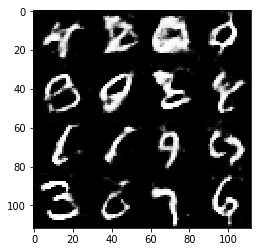

Epoch 2/2... Generator Loss: 1.4938 Discriminator Loss: 1.0377...
Epoch 2/2... Generator Loss: 1.2373 Discriminator Loss: 1.0859...
Epoch 2/2... Generator Loss: 1.0639 Discriminator Loss: 1.2461...


In [30]:
batch_size = 128
z_dim = 100
learning_rate = .0002
beta1 = .5
#this try with a higher loss in the generator after adding dropout in the generator 
# more realistic images

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Generator Loss: 4.5096 Discriminator Loss: 0.3900...
Epoch 1/2... Generator Loss: 4.4716 Discriminator Loss: 0.5556...
Epoch 1/2... Generator Loss: 4.9091 Discriminator Loss: 0.3823...
Epoch 1/2... Generator Loss: 5.8114 Discriminator Loss: 0.3985...
Epoch 1/2... Generator Loss: 5.8725 Discriminator Loss: 0.3845...
Epoch 1/2... Generator Loss: 5.3634 Discriminator Loss: 0.3905...
Epoch 1/2... Generator Loss: 1.9931 Discriminator Loss: 0.6292...
Epoch 1/2... Generator Loss: 5.8549 Discriminator Loss: 0.3678...
Epoch 1/2... Generator Loss: 6.3383 Discriminator Loss: 0.3652...
Epoch 1/2... Generator Loss: 6.7424 Discriminator Loss: 0.3683...


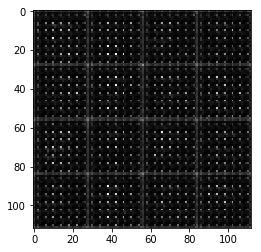

Epoch 1/2... Generator Loss: 5.9103 Discriminator Loss: 0.3543...
Epoch 1/2... Generator Loss: 0.4728 Discriminator Loss: 2.4791...
Epoch 1/2... Generator Loss: 1.6829 Discriminator Loss: 0.9203...
Epoch 1/2... Generator Loss: 0.9813 Discriminator Loss: 1.3873...
Epoch 1/2... Generator Loss: 0.9408 Discriminator Loss: 1.2577...
Epoch 1/2... Generator Loss: 0.9222 Discriminator Loss: 1.3107...
Epoch 1/2... Generator Loss: 1.2712 Discriminator Loss: 1.0802...
Epoch 1/2... Generator Loss: 1.1559 Discriminator Loss: 1.0981...
Epoch 1/2... Generator Loss: 0.9374 Discriminator Loss: 1.2777...
Epoch 1/2... Generator Loss: 0.9148 Discriminator Loss: 1.2627...


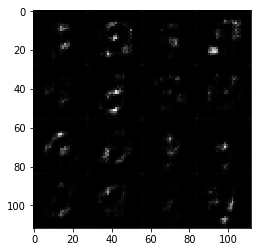

Epoch 1/2... Generator Loss: 0.8031 Discriminator Loss: 1.3455...
Epoch 1/2... Generator Loss: 0.9013 Discriminator Loss: 1.2876...
Epoch 1/2... Generator Loss: 1.4147 Discriminator Loss: 1.1553...
Epoch 1/2... Generator Loss: 1.1124 Discriminator Loss: 1.0499...
Epoch 1/2... Generator Loss: 0.9536 Discriminator Loss: 1.1442...
Epoch 1/2... Generator Loss: 1.4168 Discriminator Loss: 1.1777...
Epoch 1/2... Generator Loss: 1.5462 Discriminator Loss: 1.1343...
Epoch 1/2... Generator Loss: 1.3626 Discriminator Loss: 1.0151...
Epoch 1/2... Generator Loss: 1.0355 Discriminator Loss: 1.0556...
Epoch 1/2... Generator Loss: 1.2985 Discriminator Loss: 1.0760...


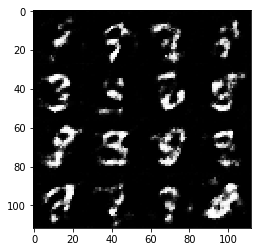

Epoch 1/2... Generator Loss: 1.4453 Discriminator Loss: 1.1749...
Epoch 1/2... Generator Loss: 1.4427 Discriminator Loss: 0.9982...
Epoch 1/2... Generator Loss: 0.6889 Discriminator Loss: 1.3755...
Epoch 1/2... Generator Loss: 0.8986 Discriminator Loss: 1.1464...
Epoch 1/2... Generator Loss: 1.5548 Discriminator Loss: 0.9509...
Epoch 1/2... Generator Loss: 1.9489 Discriminator Loss: 1.0404...
Epoch 1/2... Generator Loss: 1.7246 Discriminator Loss: 0.9999...
Epoch 1/2... Generator Loss: 1.4607 Discriminator Loss: 0.9241...
Epoch 1/2... Generator Loss: 1.9544 Discriminator Loss: 1.0292...
Epoch 1/2... Generator Loss: 1.2793 Discriminator Loss: 1.0708...


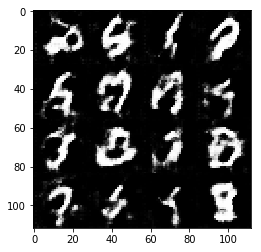

Epoch 1/2... Generator Loss: 1.9524 Discriminator Loss: 1.0620...
Epoch 1/2... Generator Loss: 0.8598 Discriminator Loss: 1.2362...
Epoch 1/2... Generator Loss: 0.7457 Discriminator Loss: 1.4091...
Epoch 1/2... Generator Loss: 1.3080 Discriminator Loss: 1.2175...
Epoch 1/2... Generator Loss: 1.2123 Discriminator Loss: 1.0885...
Epoch 1/2... Generator Loss: 1.4618 Discriminator Loss: 0.9476...
Epoch 1/2... Generator Loss: 1.0294 Discriminator Loss: 1.1929...
Epoch 1/2... Generator Loss: 0.9169 Discriminator Loss: 1.2207...
Epoch 1/2... Generator Loss: 1.3171 Discriminator Loss: 1.0112...
Epoch 1/2... Generator Loss: 1.2105 Discriminator Loss: 1.1581...


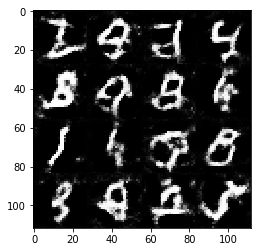

Epoch 1/2... Generator Loss: 0.8480 Discriminator Loss: 1.1058...
Epoch 1/2... Generator Loss: 0.7515 Discriminator Loss: 1.3287...
Epoch 1/2... Generator Loss: 1.3509 Discriminator Loss: 1.0554...
Epoch 1/2... Generator Loss: 0.8183 Discriminator Loss: 1.1434...
Epoch 1/2... Generator Loss: 1.2279 Discriminator Loss: 1.1819...
Epoch 1/2... Generator Loss: 0.9636 Discriminator Loss: 1.2248...
Epoch 1/2... Generator Loss: 1.1529 Discriminator Loss: 1.1402...
Epoch 1/2... Generator Loss: 1.5094 Discriminator Loss: 1.3218...
Epoch 1/2... Generator Loss: 1.5181 Discriminator Loss: 1.1068...
Epoch 1/2... Generator Loss: 1.1684 Discriminator Loss: 1.0796...


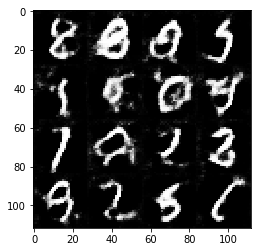

Epoch 1/2... Generator Loss: 1.0874 Discriminator Loss: 1.1682...
Epoch 1/2... Generator Loss: 0.9793 Discriminator Loss: 1.2584...
Epoch 1/2... Generator Loss: 0.9858 Discriminator Loss: 1.2748...
Epoch 1/2... Generator Loss: 1.6883 Discriminator Loss: 1.1534...
Epoch 1/2... Generator Loss: 1.0892 Discriminator Loss: 1.1450...
Epoch 1/2... Generator Loss: 1.3846 Discriminator Loss: 1.1937...
Epoch 1/2... Generator Loss: 0.7754 Discriminator Loss: 1.3480...
Epoch 1/2... Generator Loss: 0.5176 Discriminator Loss: 1.5755...
Epoch 1/2... Generator Loss: 0.9831 Discriminator Loss: 1.0886...
Epoch 1/2... Generator Loss: 0.9079 Discriminator Loss: 1.1013...


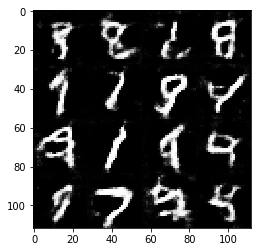

Epoch 1/2... Generator Loss: 1.3255 Discriminator Loss: 1.2028...
Epoch 1/2... Generator Loss: 1.2315 Discriminator Loss: 1.1311...
Epoch 1/2... Generator Loss: 1.3428 Discriminator Loss: 1.2794...
Epoch 1/2... Generator Loss: 1.2159 Discriminator Loss: 1.1218...
Epoch 1/2... Generator Loss: 1.4551 Discriminator Loss: 1.0481...
Epoch 1/2... Generator Loss: 1.7233 Discriminator Loss: 1.1770...
Epoch 1/2... Generator Loss: 1.1699 Discriminator Loss: 1.0474...
Epoch 1/2... Generator Loss: 1.0546 Discriminator Loss: 1.0813...
Epoch 1/2... Generator Loss: 1.1142 Discriminator Loss: 1.0259...
Epoch 1/2... Generator Loss: 0.9900 Discriminator Loss: 1.2268...


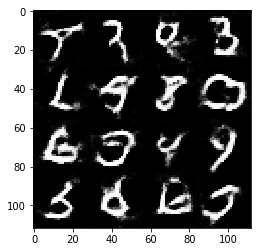

Epoch 1/2... Generator Loss: 1.0193 Discriminator Loss: 1.3405...
Epoch 1/2... Generator Loss: 1.0957 Discriminator Loss: 1.0238...
Epoch 1/2... Generator Loss: 1.4262 Discriminator Loss: 1.1190...
Epoch 1/2... Generator Loss: 0.9789 Discriminator Loss: 1.2403...
Epoch 1/2... Generator Loss: 1.4587 Discriminator Loss: 1.0779...
Epoch 1/2... Generator Loss: 1.2925 Discriminator Loss: 1.1905...
Epoch 1/2... Generator Loss: 1.2705 Discriminator Loss: 1.0527...
Epoch 1/2... Generator Loss: 1.1583 Discriminator Loss: 1.0377...
Epoch 1/2... Generator Loss: 1.1581 Discriminator Loss: 1.0259...
Epoch 1/2... Generator Loss: 1.2738 Discriminator Loss: 1.2273...


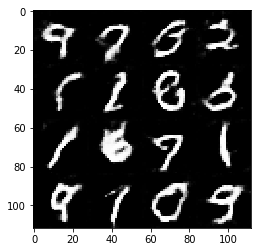

Epoch 1/2... Generator Loss: 0.7229 Discriminator Loss: 1.2428...
Epoch 1/2... Generator Loss: 0.8943 Discriminator Loss: 1.3172...
Epoch 1/2... Generator Loss: 0.5402 Discriminator Loss: 1.4264...
Epoch 2/2... Generator Loss: 1.5189 Discriminator Loss: 1.2010...
Epoch 2/2... Generator Loss: 0.9179 Discriminator Loss: 1.2831...
Epoch 2/2... Generator Loss: 0.9865 Discriminator Loss: 1.1540...
Epoch 2/2... Generator Loss: 1.1903 Discriminator Loss: 1.0828...
Epoch 2/2... Generator Loss: 1.2016 Discriminator Loss: 1.2404...


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = .0002
beta1 = .5
#this try with a higher loss in the generator after adding dropout in the generator 
# more realistic images

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Generator Loss: 3.3686 Discriminator Loss: 0.5258...
Epoch 1/1... Generator Loss: 3.6023 Discriminator Loss: 0.5873...
Epoch 1/1... Generator Loss: 7.3903 Discriminator Loss: 0.5159...
Epoch 1/1... Generator Loss: 3.4795 Discriminator Loss: 0.9348...
Epoch 1/1... Generator Loss: 0.9156 Discriminator Loss: 1.2365...
Epoch 1/1... Generator Loss: 1.8037 Discriminator Loss: 0.7035...
Epoch 1/1... Generator Loss: 1.9346 Discriminator Loss: 0.5715...
Epoch 1/1... Generator Loss: 2.5828 Discriminator Loss: 0.8280...
Epoch 1/1... Generator Loss: 2.4586 Discriminator Loss: 0.5569...
Epoch 1/1... Generator Loss: 1.6947 Discriminator Loss: 0.7041...


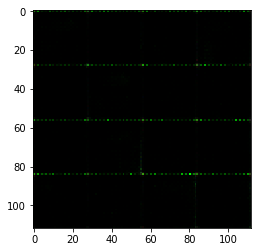

Epoch 1/1... Generator Loss: 1.2802 Discriminator Loss: 0.8954...
Epoch 1/1... Generator Loss: 3.6005 Discriminator Loss: 1.3954...
Epoch 1/1... Generator Loss: 1.9392 Discriminator Loss: 0.8655...
Epoch 1/1... Generator Loss: 2.6089 Discriminator Loss: 0.8438...
Epoch 1/1... Generator Loss: 0.4666 Discriminator Loss: 1.8550...
Epoch 1/1... Generator Loss: 0.9388 Discriminator Loss: 1.0668...
Epoch 1/1... Generator Loss: 0.7797 Discriminator Loss: 1.3520...
Epoch 1/1... Generator Loss: 0.6572 Discriminator Loss: 1.2914...
Epoch 1/1... Generator Loss: 1.3580 Discriminator Loss: 0.9164...
Epoch 1/1... Generator Loss: 2.1373 Discriminator Loss: 0.9448...


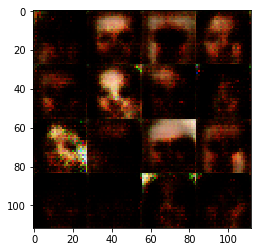

Epoch 1/1... Generator Loss: 0.9095 Discriminator Loss: 0.9738...
Epoch 1/1... Generator Loss: 1.7842 Discriminator Loss: 1.1390...
Epoch 1/1... Generator Loss: 3.5308 Discriminator Loss: 1.2643...
Epoch 1/1... Generator Loss: 0.4767 Discriminator Loss: 1.7361...
Epoch 1/1... Generator Loss: 0.2633 Discriminator Loss: 2.1990...
Epoch 1/1... Generator Loss: 0.5218 Discriminator Loss: 1.8217...
Epoch 1/1... Generator Loss: 0.5397 Discriminator Loss: 1.3629...
Epoch 1/1... Generator Loss: 0.6396 Discriminator Loss: 1.2960...
Epoch 1/1... Generator Loss: 3.7760 Discriminator Loss: 2.0038...
Epoch 1/1... Generator Loss: 0.7976 Discriminator Loss: 1.2187...


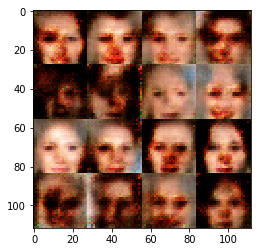

Epoch 1/1... Generator Loss: 2.3966 Discriminator Loss: 1.3154...
Epoch 1/1... Generator Loss: 2.3592 Discriminator Loss: 1.5667...
Epoch 1/1... Generator Loss: 2.0461 Discriminator Loss: 0.7724...
Epoch 1/1... Generator Loss: 0.8730 Discriminator Loss: 1.1302...
Epoch 1/1... Generator Loss: 0.8389 Discriminator Loss: 1.1662...
Epoch 1/1... Generator Loss: 2.1767 Discriminator Loss: 1.0041...
Epoch 1/1... Generator Loss: 2.0182 Discriminator Loss: 1.2473...
Epoch 1/1... Generator Loss: 0.7474 Discriminator Loss: 1.1918...
Epoch 1/1... Generator Loss: 0.5450 Discriminator Loss: 1.5168...
Epoch 1/1... Generator Loss: 0.8844 Discriminator Loss: 1.2100...


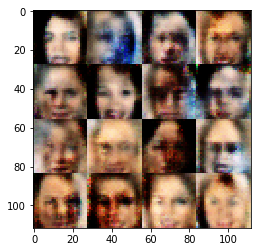

Epoch 1/1... Generator Loss: 2.1505 Discriminator Loss: 1.2867...
Epoch 1/1... Generator Loss: 1.1584 Discriminator Loss: 1.0609...
Epoch 1/1... Generator Loss: 1.3079 Discriminator Loss: 1.0046...
Epoch 1/1... Generator Loss: 1.4775 Discriminator Loss: 1.0796...
Epoch 1/1... Generator Loss: 1.7992 Discriminator Loss: 1.1891...
Epoch 1/1... Generator Loss: 1.7068 Discriminator Loss: 1.1296...
Epoch 1/1... Generator Loss: 0.6596 Discriminator Loss: 1.2302...
Epoch 1/1... Generator Loss: 0.6526 Discriminator Loss: 1.3739...
Epoch 1/1... Generator Loss: 1.6228 Discriminator Loss: 0.9108...
Epoch 1/1... Generator Loss: 1.8541 Discriminator Loss: 1.1907...


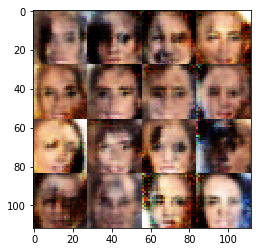

Epoch 1/1... Generator Loss: 0.7471 Discriminator Loss: 1.2971...
Epoch 1/1... Generator Loss: 0.9312 Discriminator Loss: 1.0957...
Epoch 1/1... Generator Loss: 1.6990 Discriminator Loss: 1.3516...
Epoch 1/1... Generator Loss: 0.6738 Discriminator Loss: 1.2254...
Epoch 1/1... Generator Loss: 0.6195 Discriminator Loss: 1.3284...
Epoch 1/1... Generator Loss: 1.3839 Discriminator Loss: 1.1502...
Epoch 1/1... Generator Loss: 0.6609 Discriminator Loss: 1.2480...
Epoch 1/1... Generator Loss: 1.0935 Discriminator Loss: 1.1550...
Epoch 1/1... Generator Loss: 0.6055 Discriminator Loss: 1.3144...
Epoch 1/1... Generator Loss: 0.2863 Discriminator Loss: 1.9225...


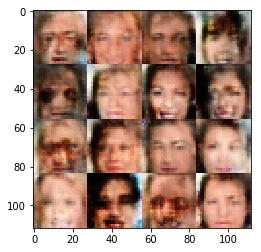

Epoch 1/1... Generator Loss: 0.5090 Discriminator Loss: 1.6272...
Epoch 1/1... Generator Loss: 1.1968 Discriminator Loss: 0.9824...
Epoch 1/1... Generator Loss: 0.7604 Discriminator Loss: 1.2477...
Epoch 1/1... Generator Loss: 1.9332 Discriminator Loss: 1.4547...
Epoch 1/1... Generator Loss: 1.3796 Discriminator Loss: 1.0572...
Epoch 1/1... Generator Loss: 0.8496 Discriminator Loss: 1.1577...
Epoch 1/1... Generator Loss: 0.8021 Discriminator Loss: 1.0619...
Epoch 1/1... Generator Loss: 0.8789 Discriminator Loss: 1.2101...
Epoch 1/1... Generator Loss: 1.4270 Discriminator Loss: 0.9695...
Epoch 1/1... Generator Loss: 1.0671 Discriminator Loss: 1.1695...


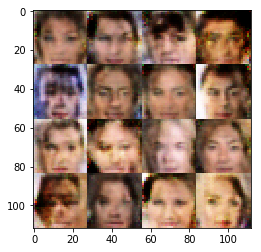

Epoch 1/1... Generator Loss: 0.8745 Discriminator Loss: 1.3188...
Epoch 1/1... Generator Loss: 1.2689 Discriminator Loss: 1.0383...
Epoch 1/1... Generator Loss: 0.8740 Discriminator Loss: 1.1870...
Epoch 1/1... Generator Loss: 0.5389 Discriminator Loss: 1.4218...
Epoch 1/1... Generator Loss: 0.7882 Discriminator Loss: 1.2548...
Epoch 1/1... Generator Loss: 0.5307 Discriminator Loss: 1.4706...
Epoch 1/1... Generator Loss: 0.8846 Discriminator Loss: 1.1679...
Epoch 1/1... Generator Loss: 0.8846 Discriminator Loss: 1.1971...
Epoch 1/1... Generator Loss: 0.8270 Discriminator Loss: 1.2012...
Epoch 1/1... Generator Loss: 0.7557 Discriminator Loss: 1.3347...


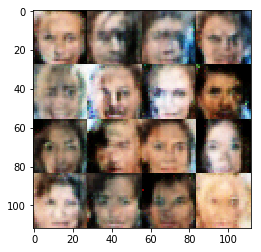

Epoch 1/1... Generator Loss: 1.0621 Discriminator Loss: 1.2655...
Epoch 1/1... Generator Loss: 1.2812 Discriminator Loss: 1.2681...
Epoch 1/1... Generator Loss: 1.0519 Discriminator Loss: 1.2736...
Epoch 1/1... Generator Loss: 0.9454 Discriminator Loss: 1.2957...
Epoch 1/1... Generator Loss: 0.5984 Discriminator Loss: 1.4634...
Epoch 1/1... Generator Loss: 0.6141 Discriminator Loss: 1.3901...
Epoch 1/1... Generator Loss: 1.4778 Discriminator Loss: 1.2716...
Epoch 1/1... Generator Loss: 1.0672 Discriminator Loss: 1.3497...
Epoch 1/1... Generator Loss: 1.2375 Discriminator Loss: 1.1067...
Epoch 1/1... Generator Loss: 0.7614 Discriminator Loss: 1.2391...


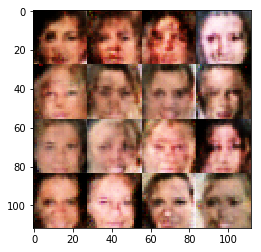

Epoch 1/1... Generator Loss: 1.2960 Discriminator Loss: 1.4149...
Epoch 1/1... Generator Loss: 0.6917 Discriminator Loss: 1.2196...
Epoch 1/1... Generator Loss: 0.5698 Discriminator Loss: 1.3900...
Epoch 1/1... Generator Loss: 0.9876 Discriminator Loss: 1.1984...
Epoch 1/1... Generator Loss: 0.4787 Discriminator Loss: 1.4000...
Epoch 1/1... Generator Loss: 0.5878 Discriminator Loss: 1.5969...
Epoch 1/1... Generator Loss: 1.1131 Discriminator Loss: 1.2437...
Epoch 1/1... Generator Loss: 1.0825 Discriminator Loss: 1.2167...
Epoch 1/1... Generator Loss: 0.9166 Discriminator Loss: 1.3668...
Epoch 1/1... Generator Loss: 1.0403 Discriminator Loss: 1.3674...


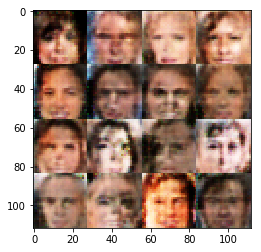

Epoch 1/1... Generator Loss: 1.4558 Discriminator Loss: 1.3359...
Epoch 1/1... Generator Loss: 0.6697 Discriminator Loss: 1.4384...
Epoch 1/1... Generator Loss: 1.0551 Discriminator Loss: 1.3283...
Epoch 1/1... Generator Loss: 0.9978 Discriminator Loss: 1.3283...
Epoch 1/1... Generator Loss: 1.2094 Discriminator Loss: 1.2838...
Epoch 1/1... Generator Loss: 0.8262 Discriminator Loss: 1.3222...
Epoch 1/1... Generator Loss: 0.7949 Discriminator Loss: 1.3128...
Epoch 1/1... Generator Loss: 0.8272 Discriminator Loss: 1.5249...
Epoch 1/1... Generator Loss: 1.0667 Discriminator Loss: 1.2418...
Epoch 1/1... Generator Loss: 0.6836 Discriminator Loss: 1.5547...


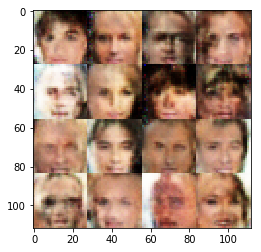

Epoch 1/1... Generator Loss: 0.8384 Discriminator Loss: 1.2652...
Epoch 1/1... Generator Loss: 0.6407 Discriminator Loss: 1.4184...
Epoch 1/1... Generator Loss: 0.8988 Discriminator Loss: 1.2570...
Epoch 1/1... Generator Loss: 0.6288 Discriminator Loss: 1.3052...
Epoch 1/1... Generator Loss: 0.6638 Discriminator Loss: 1.3573...
Epoch 1/1... Generator Loss: 0.7451 Discriminator Loss: 1.4152...
Epoch 1/1... Generator Loss: 1.1539 Discriminator Loss: 1.3469...
Epoch 1/1... Generator Loss: 1.0405 Discriminator Loss: 1.2287...
Epoch 1/1... Generator Loss: 0.9741 Discriminator Loss: 1.3322...
Epoch 1/1... Generator Loss: 0.8216 Discriminator Loss: 1.3102...


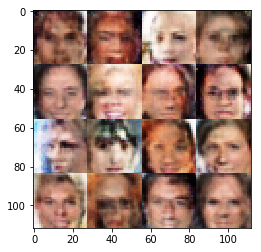

Epoch 1/1... Generator Loss: 0.6689 Discriminator Loss: 1.3265...
Epoch 1/1... Generator Loss: 0.9951 Discriminator Loss: 1.2761...
Epoch 1/1... Generator Loss: 0.7731 Discriminator Loss: 1.3599...
Epoch 1/1... Generator Loss: 1.2610 Discriminator Loss: 1.1298...
Epoch 1/1... Generator Loss: 0.8940 Discriminator Loss: 1.2300...
Epoch 1/1... Generator Loss: 0.8355 Discriminator Loss: 1.3463...
Epoch 1/1... Generator Loss: 0.8293 Discriminator Loss: 1.2759...
Epoch 1/1... Generator Loss: 1.1910 Discriminator Loss: 1.2137...
Epoch 1/1... Generator Loss: 0.6456 Discriminator Loss: 1.3759...
Epoch 1/1... Generator Loss: 1.1933 Discriminator Loss: 1.1304...


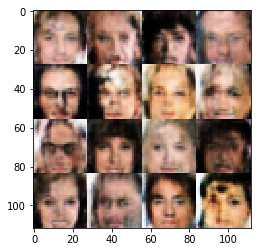

Epoch 1/1... Generator Loss: 0.7218 Discriminator Loss: 1.4791...
Epoch 1/1... Generator Loss: 1.0160 Discriminator Loss: 1.2936...
Epoch 1/1... Generator Loss: 0.6889 Discriminator Loss: 1.3123...
Epoch 1/1... Generator Loss: 0.8670 Discriminator Loss: 1.2480...
Epoch 1/1... Generator Loss: 1.1258 Discriminator Loss: 1.2090...
Epoch 1/1... Generator Loss: 0.7228 Discriminator Loss: 1.3649...
Epoch 1/1... Generator Loss: 0.9067 Discriminator Loss: 1.5150...
Epoch 1/1... Generator Loss: 0.9811 Discriminator Loss: 1.1422...
Epoch 1/1... Generator Loss: 0.8418 Discriminator Loss: 1.4815...
Epoch 1/1... Generator Loss: 0.6875 Discriminator Loss: 1.3778...


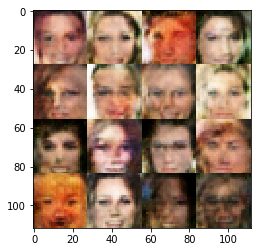

Epoch 1/1... Generator Loss: 0.9528 Discriminator Loss: 1.3992...
Epoch 1/1... Generator Loss: 0.8888 Discriminator Loss: 1.3017...
Epoch 1/1... Generator Loss: 0.6291 Discriminator Loss: 1.3844...
Epoch 1/1... Generator Loss: 0.8088 Discriminator Loss: 1.2172...
Epoch 1/1... Generator Loss: 0.7462 Discriminator Loss: 1.2905...
Epoch 1/1... Generator Loss: 0.6032 Discriminator Loss: 1.4176...
Epoch 1/1... Generator Loss: 0.7721 Discriminator Loss: 1.2663...
Epoch 1/1... Generator Loss: 0.9006 Discriminator Loss: 1.3369...
Epoch 1/1... Generator Loss: 0.7689 Discriminator Loss: 1.5090...
Epoch 1/1... Generator Loss: 0.8697 Discriminator Loss: 1.3582...


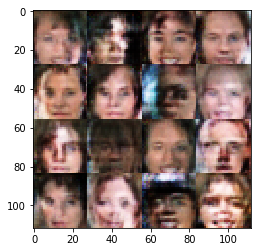

Epoch 1/1... Generator Loss: 0.7715 Discriminator Loss: 1.2510...
Epoch 1/1... Generator Loss: 0.9263 Discriminator Loss: 1.3306...
Epoch 1/1... Generator Loss: 0.8789 Discriminator Loss: 1.3641...
Epoch 1/1... Generator Loss: 0.9012 Discriminator Loss: 1.3614...
Epoch 1/1... Generator Loss: 1.0493 Discriminator Loss: 1.2819...
Epoch 1/1... Generator Loss: 0.8234 Discriminator Loss: 1.2657...
Epoch 1/1... Generator Loss: 1.1573 Discriminator Loss: 1.2339...
Epoch 1/1... Generator Loss: 0.7263 Discriminator Loss: 1.3069...
Epoch 1/1... Generator Loss: 0.7701 Discriminator Loss: 1.4889...
Epoch 1/1... Generator Loss: 0.8558 Discriminator Loss: 1.2263...


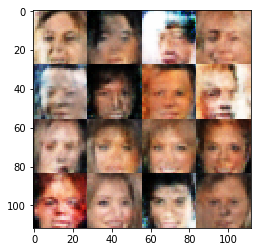

Epoch 1/1... Generator Loss: 0.7014 Discriminator Loss: 1.3996...
Epoch 1/1... Generator Loss: 0.6523 Discriminator Loss: 1.6031...
Epoch 1/1... Generator Loss: 1.0535 Discriminator Loss: 1.2986...
Epoch 1/1... Generator Loss: 0.7907 Discriminator Loss: 1.4146...
Epoch 1/1... Generator Loss: 0.9481 Discriminator Loss: 1.4014...
Epoch 1/1... Generator Loss: 0.8375 Discriminator Loss: 1.3499...
Epoch 1/1... Generator Loss: 0.7735 Discriminator Loss: 1.3211...
Epoch 1/1... Generator Loss: 0.9320 Discriminator Loss: 1.1606...
Epoch 1/1... Generator Loss: 0.8914 Discriminator Loss: 1.3512...
Epoch 1/1... Generator Loss: 0.6977 Discriminator Loss: 1.3802...


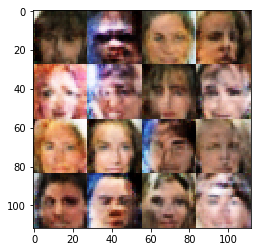

Epoch 1/1... Generator Loss: 0.7559 Discriminator Loss: 1.3802...
Epoch 1/1... Generator Loss: 0.7751 Discriminator Loss: 1.3098...
Epoch 1/1... Generator Loss: 0.9057 Discriminator Loss: 1.3942...
Epoch 1/1... Generator Loss: 0.6698 Discriminator Loss: 1.3919...
Epoch 1/1... Generator Loss: 0.6446 Discriminator Loss: 1.3982...
Epoch 1/1... Generator Loss: 0.7974 Discriminator Loss: 1.4740...
Epoch 1/1... Generator Loss: 0.8291 Discriminator Loss: 1.3106...
Epoch 1/1... Generator Loss: 0.7691 Discriminator Loss: 1.3697...
Epoch 1/1... Generator Loss: 0.9295 Discriminator Loss: 1.2514...
Epoch 1/1... Generator Loss: 0.8859 Discriminator Loss: 1.3689...


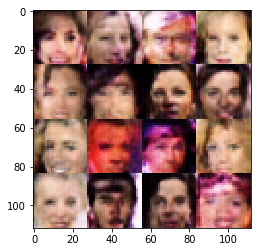

Epoch 1/1... Generator Loss: 0.9270 Discriminator Loss: 1.2799...
Epoch 1/1... Generator Loss: 0.6504 Discriminator Loss: 1.3378...
Epoch 1/1... Generator Loss: 1.0860 Discriminator Loss: 1.3124...
Epoch 1/1... Generator Loss: 0.7203 Discriminator Loss: 1.4261...
Epoch 1/1... Generator Loss: 0.7900 Discriminator Loss: 1.4132...
Epoch 1/1... Generator Loss: 0.6902 Discriminator Loss: 1.3357...
Epoch 1/1... Generator Loss: 0.8654 Discriminator Loss: 1.3444...
Epoch 1/1... Generator Loss: 0.9931 Discriminator Loss: 1.3053...
Epoch 1/1... Generator Loss: 0.8162 Discriminator Loss: 1.3807...
Epoch 1/1... Generator Loss: 0.9693 Discriminator Loss: 1.3440...


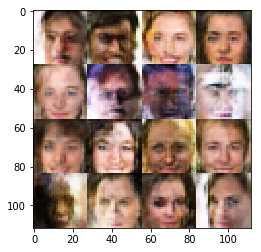

Epoch 1/1... Generator Loss: 0.6231 Discriminator Loss: 1.3728...
Epoch 1/1... Generator Loss: 0.7671 Discriminator Loss: 1.2906...
Epoch 1/1... Generator Loss: 0.7168 Discriminator Loss: 1.4108...
Epoch 1/1... Generator Loss: 0.6988 Discriminator Loss: 1.3298...
Epoch 1/1... Generator Loss: 0.8735 Discriminator Loss: 1.4379...
Epoch 1/1... Generator Loss: 0.8560 Discriminator Loss: 1.3792...
Epoch 1/1... Generator Loss: 0.9135 Discriminator Loss: 1.3336...
Epoch 1/1... Generator Loss: 0.9529 Discriminator Loss: 1.2948...
Epoch 1/1... Generator Loss: 1.0490 Discriminator Loss: 1.2180...
Epoch 1/1... Generator Loss: 0.7537 Discriminator Loss: 1.4357...


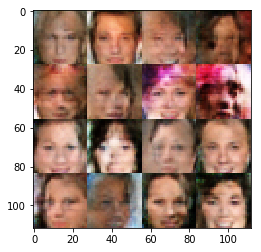

Epoch 1/1... Generator Loss: 0.8608 Discriminator Loss: 1.4285...
Epoch 1/1... Generator Loss: 0.9276 Discriminator Loss: 1.2784...
Epoch 1/1... Generator Loss: 0.9541 Discriminator Loss: 1.3561...
Epoch 1/1... Generator Loss: 0.8368 Discriminator Loss: 1.3466...
Epoch 1/1... Generator Loss: 0.7129 Discriminator Loss: 1.3987...
Epoch 1/1... Generator Loss: 0.9517 Discriminator Loss: 1.3855...
Epoch 1/1... Generator Loss: 0.7518 Discriminator Loss: 1.4061...
Epoch 1/1... Generator Loss: 0.7139 Discriminator Loss: 1.3417...
Epoch 1/1... Generator Loss: 0.7208 Discriminator Loss: 1.3584...
Epoch 1/1... Generator Loss: 0.7199 Discriminator Loss: 1.5000...


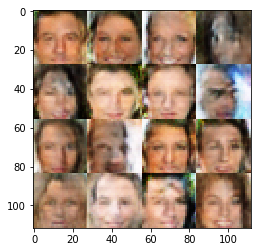

Epoch 1/1... Generator Loss: 0.9524 Discriminator Loss: 1.4753...
Epoch 1/1... Generator Loss: 1.0345 Discriminator Loss: 1.2498...
Epoch 1/1... Generator Loss: 0.9090 Discriminator Loss: 1.3541...
Epoch 1/1... Generator Loss: 0.7831 Discriminator Loss: 1.3713...
Epoch 1/1... Generator Loss: 0.7719 Discriminator Loss: 1.3050...
Epoch 1/1... Generator Loss: 0.7964 Discriminator Loss: 1.2775...
Epoch 1/1... Generator Loss: 0.9950 Discriminator Loss: 1.3446...
Epoch 1/1... Generator Loss: 0.7596 Discriminator Loss: 1.3688...
Epoch 1/1... Generator Loss: 0.7941 Discriminator Loss: 1.3023...
Epoch 1/1... Generator Loss: 0.8807 Discriminator Loss: 1.2725...


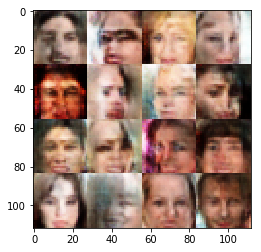

Epoch 1/1... Generator Loss: 1.0233 Discriminator Loss: 1.2492...
Epoch 1/1... Generator Loss: 0.9112 Discriminator Loss: 1.3432...
Epoch 1/1... Generator Loss: 0.7674 Discriminator Loss: 1.2756...
Epoch 1/1... Generator Loss: 0.8441 Discriminator Loss: 1.3236...
Epoch 1/1... Generator Loss: 0.6635 Discriminator Loss: 1.4685...
Epoch 1/1... Generator Loss: 0.7562 Discriminator Loss: 1.2338...
Epoch 1/1... Generator Loss: 1.0377 Discriminator Loss: 1.2528...
Epoch 1/1... Generator Loss: 1.1298 Discriminator Loss: 1.3320...
Epoch 1/1... Generator Loss: 1.0235 Discriminator Loss: 1.2323...
Epoch 1/1... Generator Loss: 0.7039 Discriminator Loss: 1.4055...


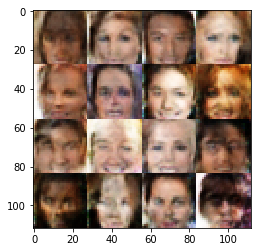

Epoch 1/1... Generator Loss: 0.7113 Discriminator Loss: 1.4219...
Epoch 1/1... Generator Loss: 0.9036 Discriminator Loss: 1.2180...
Epoch 1/1... Generator Loss: 0.7573 Discriminator Loss: 1.3655...
Epoch 1/1... Generator Loss: 0.5916 Discriminator Loss: 1.5075...
Epoch 1/1... Generator Loss: 0.7019 Discriminator Loss: 1.3306...
Epoch 1/1... Generator Loss: 0.8837 Discriminator Loss: 1.3123...
Epoch 1/1... Generator Loss: 1.0039 Discriminator Loss: 1.3149...
Epoch 1/1... Generator Loss: 0.9828 Discriminator Loss: 1.3074...
Epoch 1/1... Generator Loss: 0.7975 Discriminator Loss: 1.3232...
Epoch 1/1... Generator Loss: 1.1013 Discriminator Loss: 1.3904...


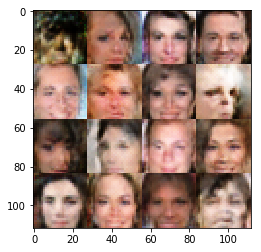

Epoch 1/1... Generator Loss: 0.7921 Discriminator Loss: 1.4333...
Epoch 1/1... Generator Loss: 0.8861 Discriminator Loss: 1.4401...
Epoch 1/1... Generator Loss: 0.9711 Discriminator Loss: 1.3268...
Epoch 1/1... Generator Loss: 0.6894 Discriminator Loss: 1.4506...
Epoch 1/1... Generator Loss: 0.8767 Discriminator Loss: 1.2884...
Epoch 1/1... Generator Loss: 0.7184 Discriminator Loss: 1.3988...
Epoch 1/1... Generator Loss: 0.7129 Discriminator Loss: 1.3765...
Epoch 1/1... Generator Loss: 0.8571 Discriminator Loss: 1.2672...
Epoch 1/1... Generator Loss: 0.8197 Discriminator Loss: 1.3510...
Epoch 1/1... Generator Loss: 0.7893 Discriminator Loss: 1.4066...


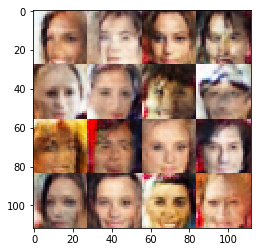

Epoch 1/1... Generator Loss: 0.8235 Discriminator Loss: 1.3560...
Epoch 1/1... Generator Loss: 0.8283 Discriminator Loss: 1.4064...
Epoch 1/1... Generator Loss: 1.1686 Discriminator Loss: 1.0706...
Epoch 1/1... Generator Loss: 0.8887 Discriminator Loss: 1.2724...
Epoch 1/1... Generator Loss: 0.8257 Discriminator Loss: 1.3645...
Epoch 1/1... Generator Loss: 0.8966 Discriminator Loss: 1.2331...
Epoch 1/1... Generator Loss: 0.9872 Discriminator Loss: 1.2905...
Epoch 1/1... Generator Loss: 0.9235 Discriminator Loss: 1.3503...
Epoch 1/1... Generator Loss: 0.9681 Discriminator Loss: 1.3297...
Epoch 1/1... Generator Loss: 0.7786 Discriminator Loss: 1.4180...


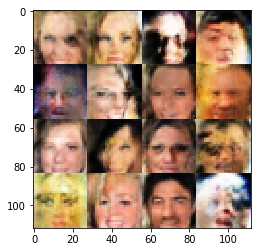

Epoch 1/1... Generator Loss: 0.6479 Discriminator Loss: 1.4252...
Epoch 1/1... Generator Loss: 0.7241 Discriminator Loss: 1.2886...
Epoch 1/1... Generator Loss: 0.8254 Discriminator Loss: 1.3061...
Epoch 1/1... Generator Loss: 0.7351 Discriminator Loss: 1.3551...
Epoch 1/1... Generator Loss: 0.9028 Discriminator Loss: 1.3671...
Epoch 1/1... Generator Loss: 0.9679 Discriminator Loss: 1.1979...
Epoch 1/1... Generator Loss: 0.7669 Discriminator Loss: 1.3038...
Epoch 1/1... Generator Loss: 0.8588 Discriminator Loss: 1.2648...
Epoch 1/1... Generator Loss: 0.8738 Discriminator Loss: 1.2656...
Epoch 1/1... Generator Loss: 0.7444 Discriminator Loss: 1.3616...


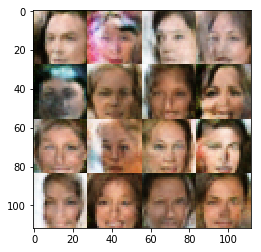

Epoch 1/1... Generator Loss: 0.8081 Discriminator Loss: 1.3564...
Epoch 1/1... Generator Loss: 0.9095 Discriminator Loss: 1.3141...
Epoch 1/1... Generator Loss: 0.7703 Discriminator Loss: 1.4315...
Epoch 1/1... Generator Loss: 0.7622 Discriminator Loss: 1.3804...
Epoch 1/1... Generator Loss: 0.7478 Discriminator Loss: 1.4207...
Epoch 1/1... Generator Loss: 0.8868 Discriminator Loss: 1.3909...
Epoch 1/1... Generator Loss: 0.9607 Discriminator Loss: 1.2501...
Epoch 1/1... Generator Loss: 0.7760 Discriminator Loss: 1.2561...
Epoch 1/1... Generator Loss: 0.7568 Discriminator Loss: 1.3549...
Epoch 1/1... Generator Loss: 0.8051 Discriminator Loss: 1.2516...


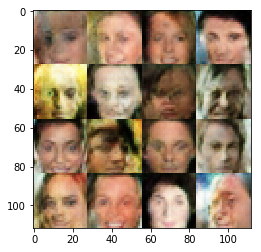

Epoch 1/1... Generator Loss: 0.7470 Discriminator Loss: 1.3729...
Epoch 1/1... Generator Loss: 1.0148 Discriminator Loss: 1.2148...
Epoch 1/1... Generator Loss: 0.8838 Discriminator Loss: 1.3382...
Epoch 1/1... Generator Loss: 0.7248 Discriminator Loss: 1.3415...
Epoch 1/1... Generator Loss: 0.6598 Discriminator Loss: 1.4000...
Epoch 1/1... Generator Loss: 0.8952 Discriminator Loss: 1.3916...
Epoch 1/1... Generator Loss: 0.7391 Discriminator Loss: 1.3946...
Epoch 1/1... Generator Loss: 0.7615 Discriminator Loss: 1.2864...
Epoch 1/1... Generator Loss: 0.8371 Discriminator Loss: 1.3499...
Epoch 1/1... Generator Loss: 0.7131 Discriminator Loss: 1.3609...


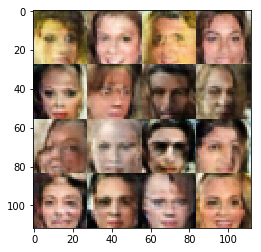

Epoch 1/1... Generator Loss: 0.7772 Discriminator Loss: 1.4368...
Epoch 1/1... Generator Loss: 0.7885 Discriminator Loss: 1.2457...
Epoch 1/1... Generator Loss: 0.7728 Discriminator Loss: 1.3656...
Epoch 1/1... Generator Loss: 0.9067 Discriminator Loss: 1.3117...
Epoch 1/1... Generator Loss: 0.7546 Discriminator Loss: 1.4238...
Epoch 1/1... Generator Loss: 0.7683 Discriminator Loss: 1.3067...
Epoch 1/1... Generator Loss: 0.9086 Discriminator Loss: 1.2822...
Epoch 1/1... Generator Loss: 0.8631 Discriminator Loss: 1.4048...
Epoch 1/1... Generator Loss: 0.7503 Discriminator Loss: 1.3535...
Epoch 1/1... Generator Loss: 0.7659 Discriminator Loss: 1.2934...


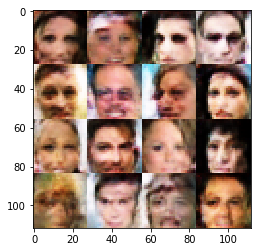

Epoch 1/1... Generator Loss: 0.8455 Discriminator Loss: 1.3545...
Epoch 1/1... Generator Loss: 0.8336 Discriminator Loss: 1.3238...
Epoch 1/1... Generator Loss: 1.0021 Discriminator Loss: 1.2962...
Epoch 1/1... Generator Loss: 0.6890 Discriminator Loss: 1.4281...
Epoch 1/1... Generator Loss: 0.9056 Discriminator Loss: 1.3235...
Epoch 1/1... Generator Loss: 0.8396 Discriminator Loss: 1.3338...
Epoch 1/1... Generator Loss: 1.0473 Discriminator Loss: 1.2329...
Epoch 1/1... Generator Loss: 0.7908 Discriminator Loss: 1.3508...
Epoch 1/1... Generator Loss: 0.7887 Discriminator Loss: 1.3735...
Epoch 1/1... Generator Loss: 0.7246 Discriminator Loss: 1.3943...


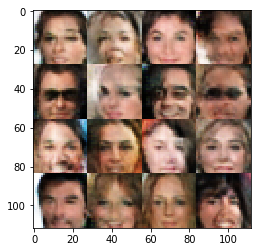

Epoch 1/1... Generator Loss: 0.8817 Discriminator Loss: 1.2716...
Epoch 1/1... Generator Loss: 0.9162 Discriminator Loss: 1.2676...
Epoch 1/1... Generator Loss: 0.8267 Discriminator Loss: 1.3380...
Epoch 1/1... Generator Loss: 0.7893 Discriminator Loss: 1.4302...
Epoch 1/1... Generator Loss: 0.7456 Discriminator Loss: 1.4557...
Epoch 1/1... Generator Loss: 1.0470 Discriminator Loss: 1.3569...


In [31]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.